<a href="https://colab.research.google.com/github/KalihoseMigisha/brain-tumor-detection/blob/main/brain_tumor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Introduction & Problem Statement
Brief Overview of the Project's Goal
This project, "Project 26: Building a Brain Tumor Detection Using Deep Learning," focuses on developing an automated system to identify brain tumors from medical images using deep learning techniques. The primary goal is to leverage the power of convolutional neural networks (CNNs) to accurately classify different types of brain tumors, thereby aiding healthcare professionals in their diagnostic processes.

##The Problem Statement
Brain tumors are among the most life-threatening neurological disorders, requiring early detection for effective treatment and improved patient outcomes. Traditional diagnostic methods, such as MRI scans analyzed by radiologists, are time-consuming, subject to human error, and dependent on specialist availability. These limitations can lead to delayed diagnoses, significantly affecting the success of treatment plans.

Deep learning has emerged as a powerful tool for medical image analysis, offering the potential to automate and enhance the accuracy of brain tumor detection. By leveraging convolutional neural networks (CNNs), this project aims to develop a deep learning model capable of classifying brain tumors from medical images with high accuracy. The model will assist healthcare professionals by providing a fast, reliable, and automated approach to brain tumor detection, reducing diagnostic time and improving early intervention.

##Why This Project is Important
This project is crucial because it addresses the critical need for a faster, more reliable, and automated approach to brain tumor detection. By developing a deep learning model, we aim to reduce diagnostic time, minimize human error, and improve the accessibility of early intervention, ultimately leading to better prognoses for patients. The integration of deep learning into medical imaging analysis offers a powerful solution to overcome the limitations of current diagnostic practices.

In [1]:
# Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


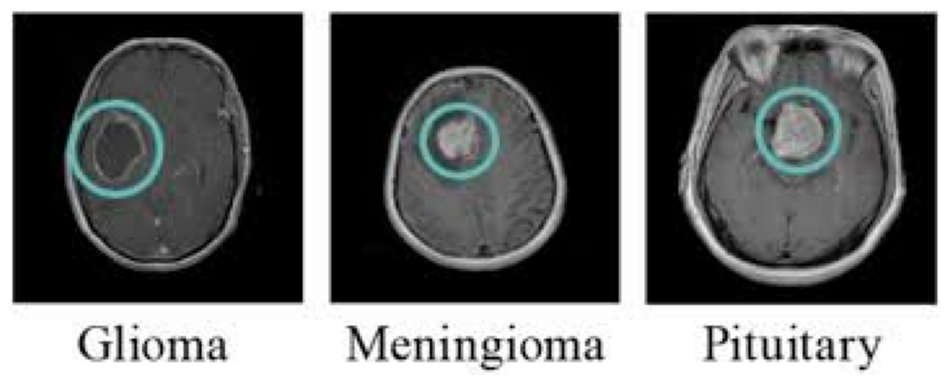

In [2]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/My Drive/Colab_Images/3-.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Set larger figure size (width=12, height=8)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

#2 Project Methodology / Roadmap Overview

This project will follow a structured and systematic methodology to develop an MRI-based brain tumor detection and classification system. The approach is designed to progress through distinct, yet interconnected, phases to ensure comprehensive development and robust performance.

The journey begins with Data Acquisition & Initial Exploration, where the raw MRI dataset will be loaded, and its characteristics thoroughly examined to inform subsequent steps. This is followed by a critical Data Preprocessing phase, focusing on preparing the images for deep learning through techniques like standardization and augmentation. The core of the system, Model Development & Training, will involve leveraging the powerful VGG16 architecture via transfer learning to build an effective classification model. A rigorous Model Evaluation stage will then assess the model's performance using a suite of metrics and visualizations, including accuracy plots, classification reports, confusion matrices, and ROC curves. Finally, the trained model will undergo Model Persistence for future use and will be discussed in the context of System Integration / Deployment to outline its potential real-world application. Throughout these phases, Key Insights & Learnings will be continuously documented, and specific Deep Dive / Bonus Read topics will be explored to enhance understanding and address technical nuances, culminating in a comprehensive Conclusion & Future Work section.
    

**Key Note**
- **Transfer Learning (VGG16):**
Transfer learning involves using a pre-trained model on a large dataset and adapting it for a new, often smaller dataset. VGG16 is a convolutional neural network (CNN) architecture, pre-trained on the ImageNet dataset, consisting of 16 layers. It is commonly used for feature extraction, where the pre-trained weights are used to extract relevant features from images, and only the final layers are fine-tuned for a new task. This approach saves time and computational resources by leveraging the knowledge learned from large datasets.


**PEFT vs. Transfer Learning**
- Transfer learning typically involves adapting an entire pre-trained model, while PEFT (Parameter-Efficient Fine-Tuning) focuses on efficiently fine-tuning only a subset of parameters in the model, often to reduce computational costs.
- You can use PEFT with VGG16 or any other pre-trained model, including models like ResNet, Inception, or EfficientNet, to fine-tune the model in a more parameter-efficient way. PEFT methods reduce the number of parameters updated during fine-tuning, making it a more efficient way to adapt models for specific tasks. However, PEFT is a strategy, not a model itself.

#3.Data Acquisition & Initial Exploration

## 3.1 Importing Tools/Required Libraries

In [3]:
import os  # Handles directory and file operations
import numpy as np  # Supports numerical computations and image array manipulation
import random  # Generates random values for data augmentation

from PIL import Image, ImageEnhance  # Provides image processing and enhancement tools
from tensorflow.keras.preprocessing.image import load_img  # Loads images efficiently

# TensorFlow modules for deep learning model development
from tensorflow.keras.models import Sequential  # Defines a sequential neural network
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense  # Adds layers to the model
from tensorflow.keras.optimizers import Adam  # Optimizer for model training

# Pre-trained deep learning model for feature extraction
from tensorflow.keras.applications import VGG16  # Imports the VGG16 model

from sklearn.utils import shuffle  # Shuffles data to prevent order-based biases


## 3.2 Data Loading

In [4]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [5]:
# List files within the downloaded directory (for debugging)
print(os.listdir(path))

['Training', 'Testing']


**Key Note**
- Given that our project focuses on Brain Tumor Detection using Deep Learning, the data we'll be working with is fundamentally different from tabular data typically stored in CSV files. Instead, our dataset will primarily consist of medical images, such as MRI (Magnetic Resonance Imaging) or CT (Computed Tomography) scans. These images are the core input for deep learning models, which are designed to learn complex patterns and features that distinguish between healthy brain tissue and tumorous regions.
- Pandas, while powerful for tabular data, is not directly suited for image processing.
-  Instead of Pandas, one can rely on libraries like:
  - OpenCV (cv2)
  - PIL (Python Imaging Library) or Pillow
  - TensorFlow/Keras or PyTorch
  - scikit-image (skimage)
  - nibabel

In [6]:
# Define paths to Training and Testing folders
# Prepend the path to the downloaded dataset
train_dir = os.path.join(path, "Training")
test_dir = os.path.join(path, "Testing")

# ================================
# Load and shuffle training data
# ================================

train_paths = []  # Stores file paths of training images
train_labels = []  # Stores corresponding labels (tumor/non-tumor)

# Loop through each class label (subfolder) in the training directory
for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)  # Full path to the label directory
    for image in os.listdir(label_path):  # Iterate through all images in the folder
        train_paths.append(os.path.join(label_path, image))  # Store image path
        train_labels.append(label)  # Store corresponding label

# Shuffle the training dataset to prevent order-based biases
train_paths, train_labels = shuffle(train_paths, train_labels)

# ===============================
# Load and shuffle testing data
# ===============================

test_paths = []  # Stores file paths of testing images
test_labels = []  # Stores corresponding labels

# Loop through each class label (subfolder) in the testing directory
for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)  # Full path to the label directory
    for image in os.listdir(label_path):  # Iterate through all images in the folder
        test_paths.append(os.path.join(label_path, image))  # Store image path
        test_labels.append(label)  # Store corresponding label

# Shuffle the testing dataset to prevent order-based biases
test_paths, test_labels = shuffle(test_paths, test_labels)


**What is Shuffling**
 - It refers to the act of randomly rearranging the order of items within a set. - In the context of data, this means:-
     - **Randomizing the sequence:** Taking a dataset and mixing up the order of its data points so that they are no longer in their original arrangement.

**Why Shuffling the Training and Testing Data**

- **Reduces bias:** Prevents models learning artificial order.
- **Improves generalization:** Ensures data representativeness.
- **Enhances training:** Aids SGD, avoids local minima.
- **Addresses class imbalance:** Distributes classes evenly.
- **Prevents memorization:** Disrupts unwanted patterns.

## 3.3 Initial Exploration

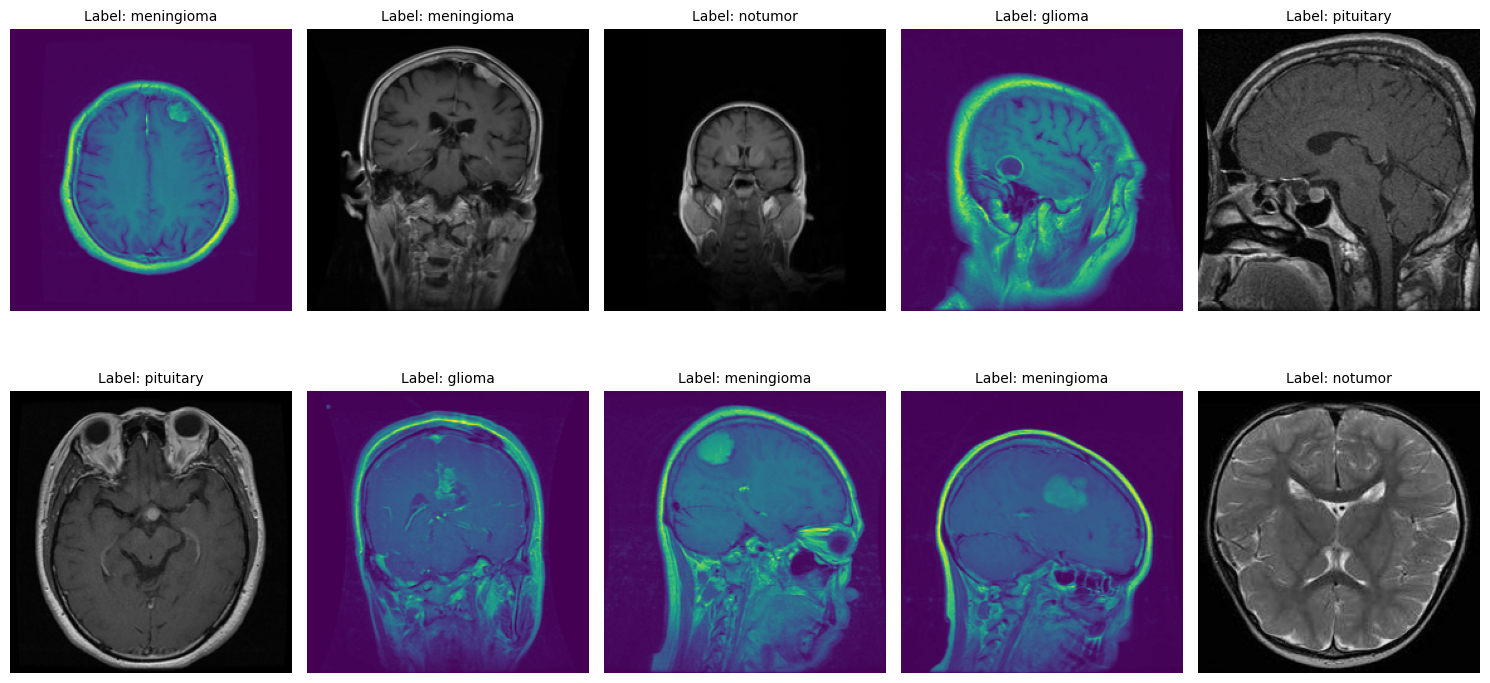

In [7]:
import random  # For generating random indices
import matplotlib.pyplot as plt  # For visualizing images
from PIL import Image  # For loading and processing images
import os  # For handling file paths and directory operations

# Select random indices to display 10 images from the training dataset
random_indices = random.sample(range(len(train_paths)), 10)

# Create a 2x5 grid to display images in 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()  # Flatten the 2D axes array for easy indexing

# Loop through the random indices and display corresponding images
for i, idx in enumerate(random_indices):
    # Load the image from the selected path
    img_path = train_paths[idx]
    img = Image.open(img_path)  # Open the image
    img = img.resize((224, 224))  # Resize image to a consistent size (224x224)

    # Display the image on the corresponding subplot
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes for cleaner image display

    # Display the class label as the image title
    axes[i].set_title(f"Label: {train_labels[idx]}", fontsize=10)

# Adjust layout for better spacing between images
plt.tight_layout()

# Show the figure with the images
plt.show()


# 4 Data Preprocessing (Helper Functions)

In [8]:
# Image Augmentation function to apply random transformations to images
def augment_image(image):
    # Convert the image array to a PIL Image object for processing
    image = Image.fromarray(np.uint8(image))

    # Apply random brightness enhancement (range between 0.8 and 1.2)
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))

    # Apply random contrast enhancement (range between 0.8 and 1.2)
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))

    # Convert the image back to a NumPy array and normalize pixel values to [0, 1]
    image = np.array(image) / 255.0

    return image

# Function to load images from file paths and apply augmentation
def open_images(paths):
    images = []  # List to store augmented images
    for path in paths:
        # Load image with a specific target size (e.g., 224x224 or 128x128)
        image = load_img(path, target_size=(128, 128))

        # Apply the augmentation function to the image
        image = augment_image(image)

        # Append the augmented image to the list
        images.append(image)

    # Return the images as a NumPy array
    return np.array(images)

# Function to encode categorical labels (convert label names to integers)
def encode_label(labels):
    # Get unique label names from the training directory
    unique_labels = os.listdir(train_dir)

    # Convert label names to integer indices (e.g., 'notumor' -> 0, 'pituitary' -> 1, 'meningioma' -> 2)
    encoded = [unique_labels.index(label) for label in labels]

    # Return encoded labels as a NumPy array
    return np.array(encoded)

# Data generator function to yield batches of images and their corresponding labels
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):  # Loop for the specified number of epochs
        for i in range(0, len(paths), batch_size):  # Loop through paths in batches
            batch_paths = paths[i:i + batch_size]  # Select a batch of paths
            batch_images = open_images(batch_paths)  # Load and augment the images

            batch_labels = labels[i:i + batch_size]  # Select corresponding labels
            batch_labels = encode_label(batch_labels)  # Encode the labels

            # Yield the batch of images and labels to the model
            yield batch_images, batch_labels


# 5 Model Development & Training

##5.1 Model Selection & Training Strategy (Fine-tuning)
- VGG16 for Transfer Learning

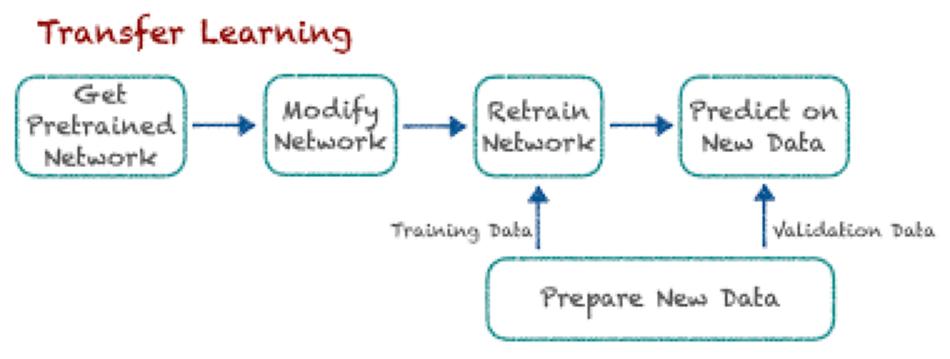

In [9]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/My Drive/Colab_Images/transfer.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Set larger figure size (width=12, height=8)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

- The model is built on top of VGG16, a pre-trained convolutional neural network (CNN) designed for image classification tasks. **Here's how the model is structured:**
1. **Loading the VGG16 Model:**
- We load the VGG16 model with the following parameters:
   - input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3): This sets the input size to match the images in our dataset (128x128 pixels).
   - include_top=False: This excludes the final fully-connected layers of the VGG16 model, which are typically used for classification. We don't need these because we will add our own classification layers.
   - weights='imagenet': This loads the pre-trained weights from the ImageNet dataset, which contains 1.4 million labeled images. These pre-trained weights help the model learn generalized features, speeding up training.

2. **Freezing the Base Model Layers:**
  - We freeze the layers of the VGG16 model to prevent their weights from being updated during training.
  - This ensures that we are only training the new layers we add on top of VGG16.

3. **Making the Last Few Layers Trainable:**
 - We choose to fine-tune the last three layers of the VGG16 model by setting them as trainable

4. **Building the Model**
 - A Sequential model is created, and the pre-trained VGG16 model is added as the base:

5. **Flattening the Output**
  - We add a Flatten layer to reshape the output from the 3D tensor produced by VGG16 to a 1D tensor, making it compatible with the following layers:
6. **Adding Dropout to Prevent Overfitting**
  - To reduce the risk of overfitting, we introduce a Dropout layer.
  - This layer randomly sets a fraction of input units to 0 during training, helping the model generalize better.
7. **Adding a Dense Layer**
  - We add a Dense layer with 128 neurons and a ReLU activation function to introduce non-linearity:
8. **Adding Another Dropout Layer**
  - Another Dropout layer is added to further prevent overfitting:
9. **Adding the Output Layer**
 - Finally, we add the output Dense layer, with the number of neurons equal to the number of unique labels in our dataset, and use the softmax activation function.
 - The softmax function outputs a probability distribution over the possible classes, which is ideal for multi-class classification.


In [10]:
# Model architecture setup
IMAGE_SIZE = 128  # Define the image size for input (adjust as needed)

# Load the VGG16 model with pre-trained weights (ImageNet) without the top classification layers
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze all layers of the VGG16 base model to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Set the last few layers of the VGG16 base model to be trainable for fine-tuning
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

# Initialize the Sequential model for custom layers
model = Sequential()

# Add an input layer with the same input shape as the images
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))  # Input layer

# Add the pre-trained VGG16 base model as feature extractor
model.add(base_model)  # Add VGG16 base model

# Flatten the output of the base model to make it compatible with fully connected layers
model.add(Flatten())  # Flatten layer to convert 3D output to 1D

# Add a Dropout layer with a rate of 0.3 to reduce overfitting
model.add(Dropout(0.3))  # Dropout layer for regularization

# Add a Dense layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))  # Fully connected layer with ReLU activation

# Add another Dropout layer with a rate of 0.2 for further regularization
model.add(Dropout(0.2))  # Dropout layer for regularization

# Add the output layer with softmax activation for multi-class classification
model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))  # Output layer with softmax activation

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.0001),  # Optimizer with a small learning rate
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['sparse_categorical_accuracy'])  # Metric for evaluating accuracy

# Parameters for training
batch_size = 20  # Number of samples per batch
steps = int(len(train_paths) / batch_size)  # Calculate steps per epoch based on data and batch size
epochs = 5  # Set the number of training epochs

# Train the model using the data generator (datagen) to feed the training data in batches
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),  # Training data generator
                    epochs=epochs,  # Set the number of epochs to train
                    steps_per_epoch=steps)  # Set steps per epoch for each training loop


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 49s 137ms/step - loss: 0.7150 - sparse_categorical_accuracy: 0.7093
Epoch 2/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - loss: 0.2582 - sparse_categorical_accuracy: 0.9071
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 0.1790 - sparse_categorical_accuracy: 0.9316
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - loss: 0.1205 - sparse_categorical_accuracy: 0.9553
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 0.0892 - sparse_categorical_accuracy: 0.9705


# 6 Model Evaluation

##6.1 Training and Validation Accuracy Plot

- **Train and Val Accuracy Plots**, refer to the graphical representation of the performance of a machine learning model during training and validation phases. These plots are used to visualize how well the model is learning and generalizing over time. There are two common types of plots:

1. **Training Accuracy:**
- This plot shows the accuracy of the model on the training dataset at each epoch. It helps you understand how well the model is fitting the training data.
2. **Validation Accuracy:**
This plot shows the accuracy of the model on a separate validation dataset (not used in training) at each epoch. It is crucial for evaluating how well the model generalizes to unseen data.

**Purpose:**
- The purpose of this plot is to visualize whether the model is overfitting, underfitting, or generalizing well. If the training accuracy keeps increasing while the validation accuracy plateaus or decreases, it indicates overfitting.

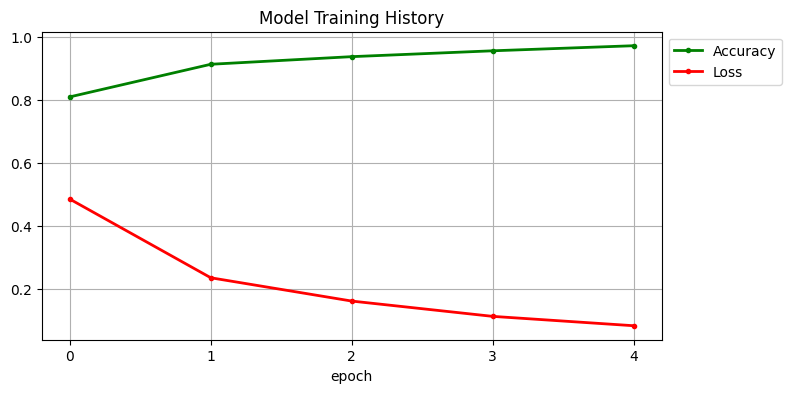

In [11]:
# Create a figure with a specific size (8x4 inches)
plt.figure(figsize=(8, 4))

# Enable grid for better readability of the plot
plt.grid(True)

# Plot the training accuracy ('sparse_categorical_accuracy') with green dots and a solid line
# The linewidth is set to 2 for better visibility
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)

# Plot the training loss ('loss') with red dots and a solid line
# The linewidth is set to 2 for better visibility
plt.plot(history.history['loss'], '.r-', linewidth=2)

# Set the title of the plot
plt.title('Model Training History')

# Label the x-axis as 'epoch'
plt.xlabel('epoch')

# Set the x-ticks to match the number of epochs
plt.xticks([x for x in range(epochs)])

# Add a legend to the plot to distinguish between 'Accuracy' and 'Loss'
# The legend is placed in the upper left corner and positioned outside the plot using bbox_to_anchor
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


## 6.2 Model Classification Report

A classification report is a summary of key evaluation metrics used to assess the performance of a classification model. It includes:
1. **Precision** (How many predicted positives are actually correct?)
2. **Recall** (How many actual positives were correctly predicted?)
3. **F1-score** (A balance between precision and recall)
4. **Support** (The number of actual instances per class)


**Why do we need it?**
- It helps evaluate model performance across different classes.
- It identifies class imbalances or misclassification trends.
- It guides model improvements by highlighting weak areas.




In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For data visualization
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc  # For model evaluation metrics
import seaborn as sns  # For enhanced visualizations
from sklearn.preprocessing import label_binarize  # For converting labels to binary format
from tensorflow.keras.models import load_model  # To load a pre-trained Keras model
import numpy as np  # For numerical operations

# Define class names (Replace with actual class names)
class_names = ["notumor", "meningioma", "glioma", "pituitary"]  # Update as per dataset

# 1. Load and preprocess test data
test_images = open_images(test_paths)  # Load test images and apply necessary augmentations
test_labels_encoded = encode_label(test_labels)  # Encode categorical labels into numerical format

# 2. Make predictions using the trained model
test_predictions = model.predict(test_images)  # Generate predictions for test images
predicted_labels = np.argmax(test_predictions, axis=1)  # Convert probabilities to class indices

# 3. Generate and display classification report with class names
report_text = classification_report(test_labels_encoded, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report_text)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step
Classification Report:
              precision    recall  f1-score   support

     notumor       0.97      0.99      0.98       300
  meningioma       0.99      0.99      0.99       405
      glioma       0.93      0.92      0.92       306
   pituitary       0.94      0.93      0.94       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



**Save the report text as a PNG image**

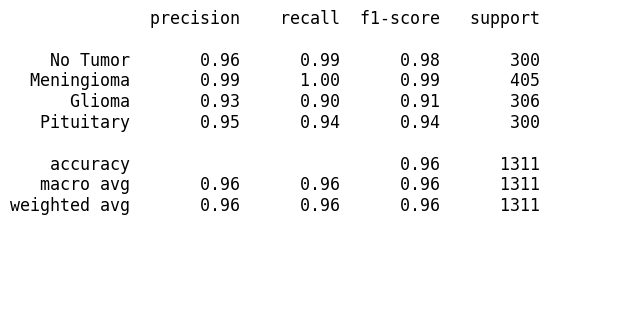

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.text(0, 1, report_text, fontsize=12, fontfamily='monospace', va='top')
ax.axis('off')
plt.savefig('classification_report.png', bbox_inches='tight', dpi=300)
plt.show()

**Key Comments**
- This classification report shows excellent performance overall (96% accuracy). ("notumor") and ("pituitary") classes have near-perfect precision, recall, and F1-scores. ("meningioma") and ("glioma") classes have slightly lower, but still good, scores, indicating some misclassification between them.  
- The model is generally reliable across all categories.

## 6.3 Model Confusion Plot (Confusion Matrix Plot)

A Confusion Matrix Plot visually represents a classification model's performance by showing the number of correct and incorrect predictions for each class.

Why is it useful?
- It helps identify misclassifications and patterns in errors.
- It highlights class imbalances and model biases.
- It provides insights for improving the model (e.g., handling false positives/negatives).

Confusion Matrix:
[[296   1   3   0]
 [  0 403   1   1]
 [ 10   5 276  15]
 [  1   0  18 281]]


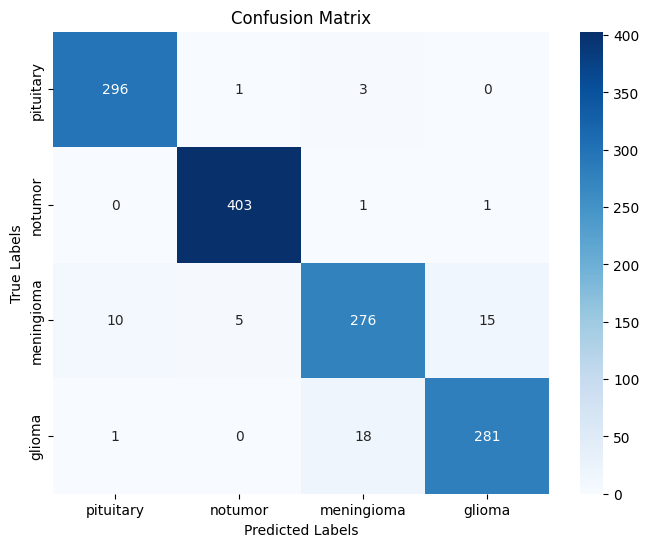

In [13]:
# 3. Confusion Matrix
# Compute the confusion matrix to evaluate classification performance
conf_matrix = confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis=1))

# Print the raw confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))  # Set the figure size for better readability

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=os.listdir(train_dir),  # Use class names for x-axis labels
            yticklabels=os.listdir(train_dir))  # Use class names for y-axis labels

# Add labels and title
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Display the plot
plt.show()


**Key Comments**
- This confusion matrix shows the performance of a classification model across four categories: notumor, meningioma, glioma, and pituitary.  Here's a breakdown:

1. **High Accuracy for notumor and pituitary:** The model
performs exceptionally well in predicting "notumor" and "pituitary" cases, with very few misclassifications.
2. **Good Performance for meningioma:** The model also performs well for "meningioma," though it has a few misclassifications with "notumor" and "glioma."
3. **Moderate Performance for glioma:** The model shows moderate performance for "glioma," with a significant number of misclassifications as "meningioma."

**in brief,** the model is strong at identifying "notumor" and "pituitary," decent at "meningioma," but struggles somewhat with "glioma." **The misclassification between "glioma" and "meningioma" suggests potential similarities or challenges in distinguishing these two categories.**

## 6.4 ROC Curve Plot (Receiver Operating Characteristic Curve)

The ROC Curve is a graphical representation of a classification model's performance across different threshold values. It plots:
1. **True Positive Rate (TPR) (Sensitivity/Recall) on the Y-axis**
2. **False Positive Rate (FPR) on the X-axis**

**Why is it useful?**

- Helps evaluate the trade-off between sensitivity and specificity.
- Measures how well the model distinguishes between classes.
- **The Area Under the Curve (AUC) quantifies overall model performance (closer to 1 is better).**


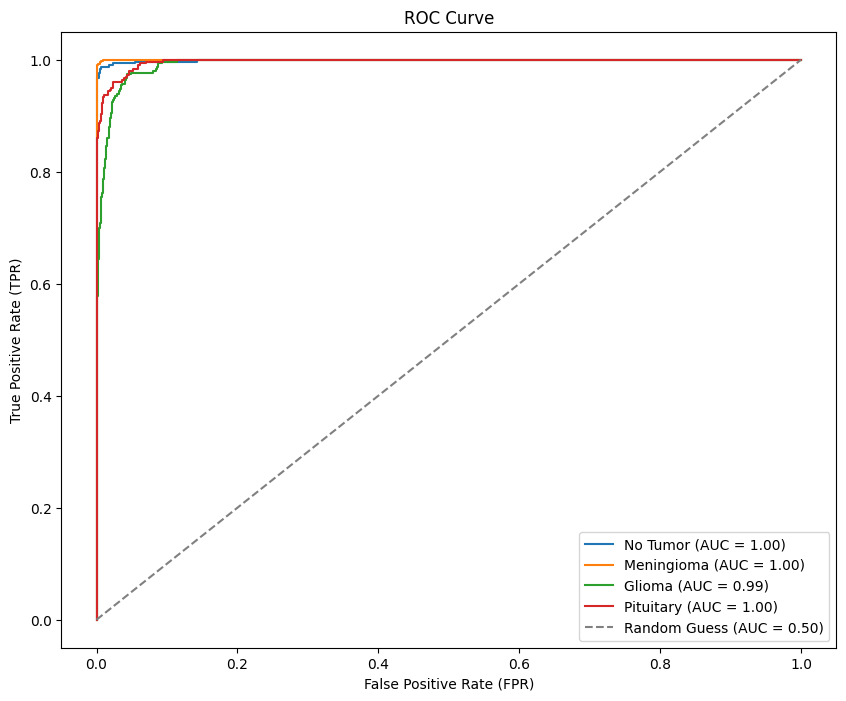

In [14]:
# 4. ROC Curve and AUC (Receiver Operating Characteristic & Area Under the Curve)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import os

# Define class names in the correct order
class_names = ["No Tumor", "Meningioma", "Glioma", "Pituitary"]

# Binarize the test labels for multi-class ROC analysis
# Converts categorical labels into a one-hot encoded format, allowing per-class ROC evaluation
test_labels_bin = label_binarize(test_labels_encoded, classes=np.arange(len(class_names)))

# The predicted probabilities for each class (already in the required format)
test_predictions_bin = test_predictions

# Initialize dictionaries to store False Positive Rate (FPR), True Positive Rate (TPR), and AUC values for each class
fpr, tpr, roc_auc = {}, {}, {}

# Compute ROC curve and AUC score for each class
for i, class_name in enumerate(class_names):
    fpr[class_name], tpr[class_name], _ = roc_curve(test_labels_bin[:, i], test_predictions_bin[:, i])  # Compute FPR & TPR
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])  # Compute AUC value for the class

# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))  # Set figure size for better visualization
for class_name in class_names:
    plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')  # Plot ROC curve with AUC score

# Add a diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess (AUC = 0.50)")

# Add plot labels and legend
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")

# Display the plot
plt.show()


**Key Comments**
This ROC curve plot shows excellent performance for all four classes (No Tumor, Meningioma, Glioma, and Pituitary).
- **High AUC Scores:** The Area Under the Curve (AUC) is very close to 1.0 for all classes (1.00, 0.99, 1.00, 1.00), indicating a strong ability to distinguish between classes.
- **Curves Close to Top Left:** The curves rise sharply towards the top-left corner, suggesting high True Positive Rates (TPR) even at low False Positive Rates (FPR). **This means the model is effectively capturing the positive cases without generating many false alarms.**
- **Significantly Better than Random Guess:** The performance is far superior to the "Random Guess" line (AUC = 0.50), demonstrating the model's predictive power.

# 7 Model Persistence

## 7.1 Saving and Loading the Model

**Key note**

1. **Saving the Entire Model (Including Optimizer State)**
   - The most comprehensive way to save a model is to include the model architecture, weights, and the optimizer state. This ensures that, when you reload the model, it will be ready for further training or evaluation without needing to recompile or set the optimizer.
   - This is especially important if you're planning to continue training the model later.
2. **Saving the Model Without Optimizer (for Inference Only)**
     - If you don't need to resume training (e.g., if you only want to deploy or use the model for inference), you can exclude the optimizer state when saving the model. This can reduce the file size and prevent issues related to optimizer mismatches when loading the model.
- Why exclude the optimizer?
   - If you're not planning to train the model further and only need to make predictions or evaluations, you don't need to save the optimizer state. This can make saving/loading faster and reduce file size.
   - **In this case, you'll need to recompile the model manually when loading, specifying your choice of optimizer, loss function, and metrics.**

In [15]:
# Save the model architecture and weights without the optimizer state
model.save("model.keras", include_optimizer=False)

##7.2 Important Note

- Since we saved with include_optimizer=False, if you plan to continue training the model object you just loaded, you must re-compile it with an optimizer, loss function, and metrics.

In [16]:
from tensorflow.keras.models import load_model
# Load the model without the optimizer state
model = load_model("model.keras")

# Recompile the model with your desired optimizer
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 8 System Integration / Deployment

In [17]:
from keras.preprocessing.image import load_img, img_to_array #img_to_array converts the loaded image into a NumPy array for model processing.
import numpy as np
import matplotlib.pyplot as plt

# Define class labels for tumor detection
class_labels = ['notumor', 'meningioma', 'glioma','pituitary']

def detect_and_display(img_path, model, image_size=128):
    """
    Detects the presence of a brain tumor in the given image using a trained model
    and displays the result along with the confidence score.

    Parameters:
    img_path (str): Path to the image file.
    model (keras.Model): Pre-trained tumor classification model.
    image_size (int, optional): Target size for image resizing. Default is 128.

    If the model predicts 'notumor', it displays "No Tumor."
    Otherwise, it shows the predicted tumor class and confidence score.
    """
    try:
        # Load the image and resize it to the required dimensions
        img = load_img(img_path, target_size=(128, 128))

        # Convert the image to a NumPy array and normalize pixel values to [0, 1]
        img_array = img_to_array(img) / 255.0

        # Expand dimensions to match the input shape expected by the model (batch size of 1)
        img_array = np.expand_dims(img_array, axis=0)

        # Perform prediction using the trained model
        predictions = model.predict(img_array)

        # Get the index of the predicted class and its confidence score
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]

        # Determine if a tumor is detected
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"

        # Display the original image with the prediction results
        plt.imshow(load_img(img_path))
        plt.axis('off')  # Hide axes for better visualization
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        # Handle any errors during image processing or prediction
        print("Error processing the image:", str(e))


#9 Key Insights & Learnings
- **np.argmax(predictions, axis=1)[0]**, the function argmax stands for **"argument of the maximum"** and is used to find the index of the highest value in an array along a specified axis.
- Neural networks in Keras/TensorFlow expect inputs in batches, typically shaped as (batch_size, height, width, channels).

**Before Expanding Dimensions (Single Image)**
- img_array.shape  # Example output: (128, 128, 3) → (Height, Width, Channels)
- This shape represents a single image without a batch dimension.

**After Expanding Dimensions**
- img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)  # Output: (1, 128, 128, 3) → (Batch, Height, Width, Channels)
- **3 → Number of color channels (RGB)**
- Now, the model receives the image as part of a batch of size 1, ensuring it aligns with the expected input format.
- **If you want to predict for multiple images at once,** you would provide a batch of images with shape (N, height, width, channels) where N is the number of images.

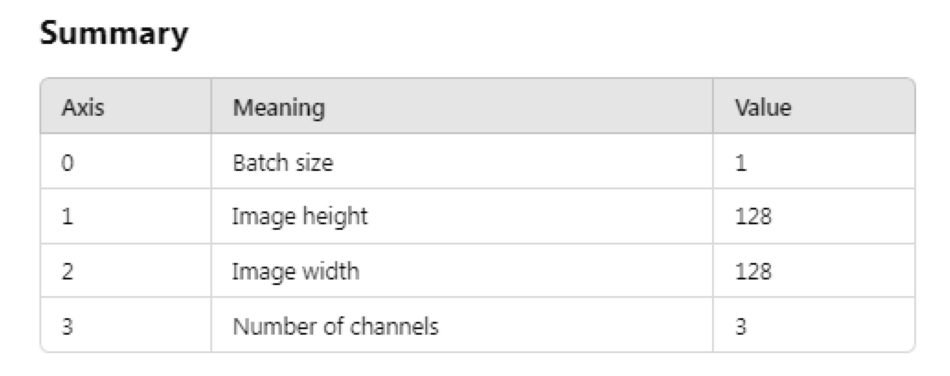

In [18]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/My Drive/Colab_Images/Axis.PNG"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Set larger figure size (width=12, height=8)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

**Example 1**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


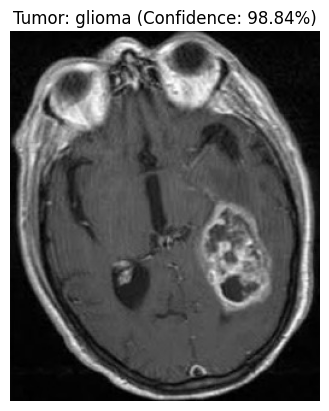

In [19]:
# Example usage

# Path to the MRI image to be analyzed
image_path = "/content/drive/My Drive/Colab_Images/Te1.jpg"

# Call the function to detect and display the tumor classification result
detect_and_display(image_path, model)


**Example 2**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


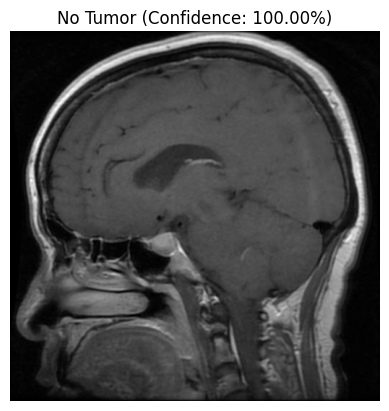

In [20]:
# Example usage

# Path to the MRI image to be analyzed
image_path = "/content/drive/My Drive/Colab_Images/Te2.jpg"

# Call the function to detect and display the tumor classification result
detect_and_display(image_path, model)

**Example 3**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


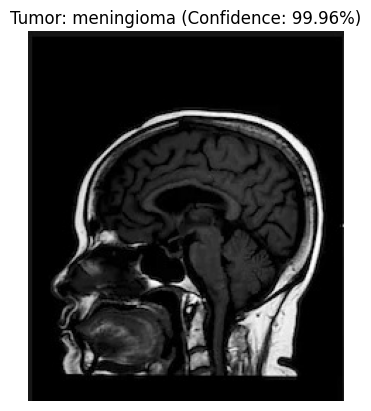

In [21]:
# Example usage

# Path to the MRI image to be analyzed
image_path = "/content/drive/My Drive/Colab_Images/Te3.jpg"

# Call the function to detect and display the tumor classification result
detect_and_display(image_path, model)

**Example 4**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


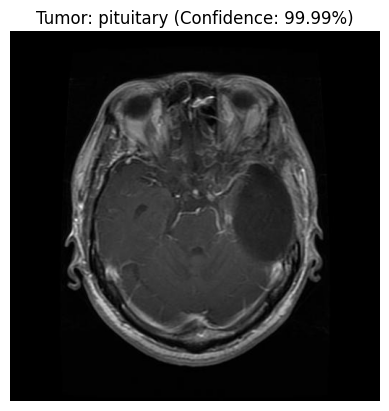

In [22]:
# Example usage

# Path to the MRI image to be analyzed
image_path = "/content/drive/My Drive/Colab_Images/Te4.jpg"

# Call the function to detect and display the tumor classification result
detect_and_display(image_path, model)

# 10 Deep Dive / Bonus Read

## 10.1 Sparse_categorical_crossentropy vs. categorical_crossentropy

1. Use sparse_categorical_crossentropy when your labels are integers (e.g., 0, 1, 2, …).
2. Use categorical_crossentropy when your labels are one-hot encoded (e.g., [1, 0, 0], [0, 1, 0]).

## Why choose sparse_categorical_crossentropy?
- More memory-efficient because it stores class labels as integers instead of full one-hot vectors.
- Convenient when working with datasets where class labels are already in integer format (e.g., MNIST, CIFAR).
- Reduces computational complexity in large-scale datasets.

# 11 Conclusion & Future Work

## Conclusion
This project successfully developed an MRI-based tumor detection and classification system, demonstrating promising capabilities in distinguishing various brain conditions. Our best-performing model exhibits high accuracy in identifying "notumor" and "pituitary" cases, with very minimal misclassifications. This indicates a robust ability to identify healthy scans and a specific tumor type. Performance for "meningioma" cases was also good, showing reliable detection with only a few instances confused with "notumor" or "glioma."

## Challenges Encountered
A primary challenge encountered was the moderate performance in accurately classifying "glioma" tumors. The confusion matrix highlighted a significant tendency for "glioma" cases to be misclassified as "meningioma." This suggests that distinguishing between these two specific tumor types poses a considerable challenge for the current model, potentially due to inherent visual similarities in MRI scans or insufficient discriminatory features learned during training. This particular misclassification warrants further investigation, as accurate differentiation between these two can be clinically significant.

## Future Work and Enhancements
Building upon these findings, several future enhancements are proposed to improve the system's overall robustness and accuracy, particularly for the more challenging "glioma" classification:

### Data-Centric Improvements
- Dataset Expansion and Diversity: Incorporating a larger and more diverse dataset, especially with more examples of "glioma" and "meningioma" tumors, could help the model learn more nuanced features for better differentiation. This could include collaborations with medical institutions to access broader patient populations.

- Data Augmentation Strategies: Exploring more advanced and domain-specific data augmentation techniques (e.g., elastic deformations, intensity transformations relevant to MRI) could further enhance the model's ability to generalize.

### Model-Centric Improvements
- Advanced Deep Learning Architectures: Exploring more complex deep learning models, such as advanced CNN architectures (e.g., EfficientNet, ResNeXt, Vision Transformers) or attention mechanisms, might enable the extraction of more intricate patterns crucial for distinguishing similar tumor types.

- Ensemble Modeling: Combining predictions from multiple models (e.g., different CNN architectures or models trained with varying hyperparameters) could potentially mitigate individual model weaknesses and improve overall classification accuracy, particularly for the challenging "glioma" vs. "meningioma" distinction.

- Loss Function Optimization: Investigating and experimenting with different loss functions specifically designed to handle class imbalance or encourage better separation of challenging classes could be beneficial.

### Interpretability and Deployment
- Explainable AI (XAI): Implementing XAI techniques (e.g., SHAP, LIME, Grad-CAM) could provide insights into which image features the model relies on for its predictions. This would help to understand why certain misclassifications occur and guide targeted feature engineering or model improvements, fostering trust in the system.

- Real-time Deployment Considerations: For future clinical application, optimizing the model for real-time inference speed and integrating it into a user-friendly interface are crucial next steps to ensure practical utility. This would involve considerations for computational efficiency, model compression techniques, and deployment environment (e.g., cloud-based API, edge device for quick preliminary assessments in clinical settings).

